In [1]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

<h2><font color="darkblue">Support Vector Machine</font></h2>
<hr/>

### Preliminaries

- Linearly separable
> Let $ S_0 $ and $ S_1 $ be two sets of points in an $ n $-dimensional Euclidean space. We say $ S_0 $ and $ S_1 $ are linearly separable if $ \quad \exists w_1, w_2, \cdots, w_n, k \quad $ such that $ \qquad \forall x \in S_0 $, $ \displaystyle \sum_{i=1}^{n} w_i x_i > k \quad $ and $ \quad \forall x \in S_1 $, $ \displaystyle \sum_{i=1}^{n} w_i x_i < k \quad $ where $ x_i $ is the $ i $-th component of $ x $.

  - Example: Linearly separable
  <img src="http://i.imgur.com/aLZlG.png" width=200 >
  
  - Example: Not linearly separable
  <img src="http://i.imgur.com/gWdPX.png" width=200 >

<p style="text-align:center">(Picture from https://www.reddit.com/r/MachineLearning/comments/15zrpp/please_explain_support_vector_machines_svm_like_i/)</p>

### Support Vector Machine (Hard-margin)

- Intuition: Find an optimal hyperplane that could maximize margin between different classes

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg" width=300 align=center>
<p style="text-align:center">(Picture from https://en.wikipedia.org/wiki/Support_vector_machine)</p>

- Data
> $ \displaystyle \{(\mathbf{x}_i, y_i) \}_{i=1}^{n} \qquad $ where $ \displaystyle \qquad \mathbf{x}_i \in \mathbb{R}^d, \  y_i \in \{-1, 1 \} $

- Linearly separable if 
> $ \displaystyle \exists (\mathbf{w}, b) \quad $ such that $ \displaystyle \quad y_i = \text{sign} \left(\langle \mathbf{w}, \mathbf{x}_i \rangle + b \right) \quad \forall i $ 
> 
> $ \displaystyle \exists (\mathbf{w}, b) \quad $ such that $ \displaystyle \quad y_i \left(\langle \mathbf{w}, \mathbf{x}_i \rangle + b \right) > 0 \quad \forall i $ 

- Margin
> The margin of a hyperplane w.r.t training data is the minimal distance between a point in the training data and the hyperplane.
> 
> In this sense, if a hyperplane has a large margin, then it still could separate the training data even if we slightly perturb each data point.

- Recall
> The distance between a point $ \mathbf{x} $ and the hyperplane defined by $ \quad (\mathbf{w}, b) \quad $ where $ \quad \lvert\lvert \mathbf{w} \rvert\rvert = 1 \quad $ is $ \quad \lvert \langle \mathbf{w}, \mathbf{x} \rangle + b \rvert $

- **Hard-SVM**: Fit a hyperplane that separates the training data with the largest possible margin
> $ \displaystyle \max_{\mathbf{w}, b: \lvert\lvert \mathbf{w} \rvert\rvert = 1}  \min\limits_{i \in [n]} \lvert \langle \mathbf{w}, \mathbf{x}_i \rangle + b \rvert \quad $ such that $ \displaystyle \quad y_i(\langle \mathbf{w}, \mathbf{x}_i \rangle + b) > 0 \quad \forall i $

- Example

In [2]:
from sklearn import svm
import numpy as np

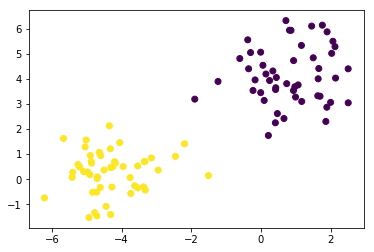

In [3]:
# Generate 100 separable points
x, y = datasets.make_blobs(n_samples=100, centers=2, random_state=3)
plt.scatter(x[:,0], x[:,1], c=y);

In [4]:
# Fit SVM
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(x, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [5]:
# Create grid to evaluate model
xx = np.linspace(x[:,0].min()-0.5, x[:,0].max()+0.5, 30)
yy = np.linspace(x[:,1].min()-0.5, x[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

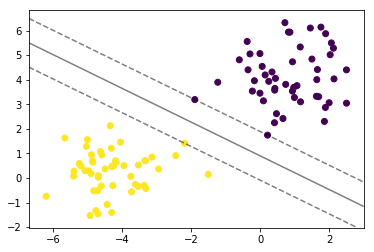

In [6]:
# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(x[:,0], x[:,1], c=y);

### Support Vector Machine (Soft-margin)

- **Hard-SVM**: Fit a hyperplane that separates the training data with the largest possible margin
> $ \displaystyle \min_{\mathbf{w}, b} \ \lvert\lvert \mathbf{w} \rvert\rvert^2 \quad $ such that $ \displaystyle \quad y_i(\langle \mathbf{w}, \mathbf{x}_i \rangle + b) > 1 \quad \forall i $

- **Soft-SVM**: Relax the condition
> $ \displaystyle \min_{\mathbf{w}, b, \zeta} \lambda \lvert\lvert \mathbf{w} \rvert\rvert^2 + \frac{1}{n} \sum_{i=1}^{n} \zeta_i \qquad $ such that $ \displaystyle \quad y_i(\langle \mathbf{w}, \mathbf{x}_i \rangle + b) \ge 1 - \zeta_i \quad $ where $ \displaystyle \quad \lambda > 0, \  \zeta_i \ge 0 $

- Kernel trick
> Map the original space into feature space (possibly of higher dimension) where data could be linearly separable.
> 
> The kernel function transform the data into a higher dimensional feature space to make it possible to perform the linear separation.

<img src="http://i.imgur.com/WuxyO.png" width=300 align=center>
<p style="text-align:center">(Picture from https://www.reddit.com/r/MachineLearning/comments/15zrpp/please_explain_support_vector_machines_svm_like_i/)</p>

<img src="https://cdn-images-1.medium.com/max/1600/1*C3j5m3E3KviEApHKleILZQ.png" width=300 align=center>
    We can just project this by mapping kernel using $x^2+y^2=z$

<img src="https://cdn-images-1.medium.com/max/1600/1*FLolUnVUjqV0EGm3CYBPLw.png" width=300 align=center>

In [21]:
# Toy Example: not linearly separable in original space (dimension=1)
x = np.arange(-10, 11)
y = np.repeat(-1, x.size)
y[np.abs(x) > 3] = 1
plt.scatter(x, np.repeat(0, x.size), c=y);

array([ 1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1])

> $ \displaystyle \phi: \mathbb{R} \rightarrow \mathbb{R}^2 $ 
>
> $ \displaystyle \phi(x) = (x, x^2) $ 

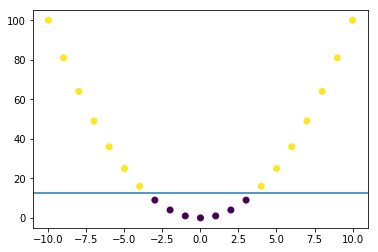

In [8]:
# Kernel trick: linearly separable in feature space (dimension=2)
plt.scatter(x, x**2, c=y);
plt.axhline(y=12.5);

- Some kernels
> Polynomial kernel: $ \displaystyle \qquad K(x, x^\prime) = \left(1 + \langle x, x^\prime \rangle \right)^d $
> 
> (Gaussian) radial basis function kernel (RBF): $ \displaystyle \qquad K(x, x^\prime) = \exp \left(- \frac{\lvert\lvert x - x^\prime \rvert\rvert^2}{2 \sigma^2} \right) = \exp (- \gamma \lvert\lvert x - x^\prime \rvert\rvert^2) \qquad $ where $ \displaystyle \qquad \gamma = \frac{1}{2 \sigma^2} $
> 
> 

- Choice of kernel

In [9]:
from sklearn.model_selection import cross_val_score

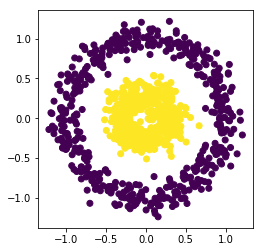

In [10]:
x, y = datasets.make_circles(n_samples=1000, factor=0.3, noise=0.1, random_state=2018)
plt.subplot(111, aspect='equal'); 
plt.scatter(x[:,0], x[:,1], c=y);

In [11]:
# Create grid to evaluate model
xx = np.linspace(x[:,0].min()-0.5, x[:,0].max()+0.5, 30)
yy = np.linspace(x[:,1].min()-0.5, x[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

10-fold cv scores with Linear kernel:  0.6249999999999999


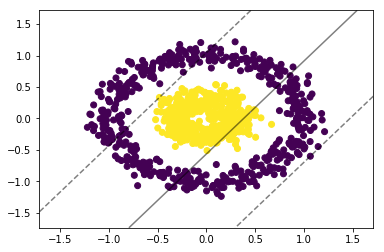

In [12]:
# Linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(x,y)
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(x[:,0], x[:,1], c=y);
print('10-fold cv scores with Linear kernel: ', np.mean(cross_val_score(clf, x, y, cv=10)))

10-fold cv scores with Polynomial kernel:  0.5670000000000001


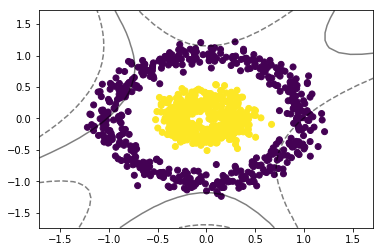

In [13]:
# Polynomial kernel
clf = svm.SVC(kernel='poly', gamma='auto')
clf.fit(x,y)
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(x[:,0], x[:,1], c=y);
print('10-fold cv scores with Polynomial kernel: ', np.mean(cross_val_score(clf, x, y, cv=10)))

10-fold cv scores with RBF kernel:  1.0


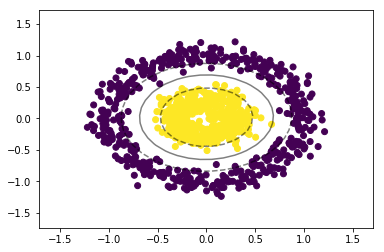

In [14]:
# RBF kernel
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(x,y)
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(x[:,0], x[:,1], c=y);
print('10-fold cv scores with RBF kernel: ', np.mean(cross_val_score(clf, x, y, cv=10)))

<br/>
- **Note:** For `SVC` in scikit-learn, it tries to solve the following problem:

$ \displaystyle \min_{w, b, \zeta} \frac{1}{2} w^\top w + C \sum_{i=1}^{n} \zeta_i \qquad $ subject to $ \displaystyle \qquad y_i \left(w^\top \phi(x_i) + b \right) \ge 1 - \zeta_i \qquad $ where $ \displaystyle \qquad \zeta_i \ge 0, i = 1, 2, \cdots, n $

[References](http://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation)
<br/>


**References**

- Friedman, J., Hastie, T., & Tibshirani, R. (2001). The elements of statistical learning. Springer series in statistics.
- Shalev-Shwartz, S., & Ben-David, S. (2014). Understanding machine learning: From theory to algorithms. Cambridge university press.

## SVM Excercise - Wisconsin Breast Cancer Dataset
> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O.L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseperable Sets", Optimization Methods and Software 1, 1992, 22-34].

## Questions - Can we find some hyperplane separating our samples such that we predict whether they are cancerous?

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

In [16]:
# load the breast cancer dataset 
d = load_breast_cancer()
x = d['data']
y = d['target']

In [17]:
# reduce dimensionality
pca = PCA(n_components=2)
x = pca.fit_transform(x)

In [18]:
# fit a SVM
clf = svm.SVC(kernel='linear')
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

10-fold cv scores with linear kernel:  0.9279653876069484


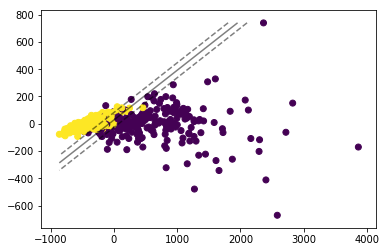

In [19]:
# Create grid to evaluate model
xx = np.linspace(x[:,0].min()-0.5, x[:,0].max()+0.5, 30)
yy = np.linspace(x[:,1].min()-0.5, x[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(x[:,0], x[:,1], c=y);
print('10-fold cv scores with linear kernel: ', np.mean(cross_val_score(clf, x, y, cv=10)))